In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FINM FixedIncome-selected.zip to FINM FixedIncome-selected.zip


In [ ]:
import zipfile

zip_path = "FINM FixedIncome-selected.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("FINM_FixedIncome_selected")
import os
os.listdir("FINM_FixedIncome_selected")

['ref_rates.xlsx',
 'project_sofr_futures_20251231.xlsx',
 'project_fomc_dates.xlsx',
 'project_gsw_yields_20251231.xlsx']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', 15)
figsize = (12, 5)

DATA_PATH = "/content/FINM_FixedIncome_selected/"

In [ ]:
sofr_prices = pd.read_excel(DATA_PATH + 'project_sofr_futures_20251231.xlsx', sheet_name='prices')
sofr_prices['date'] = pd.to_datetime(sofr_prices['date'])
sofr_prices = sofr_prices.set_index('date').sort_index()

sofr_rates = pd.read_excel(DATA_PATH + 'project_sofr_futures_20251231.xlsx', sheet_name='implied_rates')
sofr_rates['date'] = pd.to_datetime(sofr_rates['date'])
sofr_rates = sofr_rates.set_index('date').sort_index()

contract_info = pd.read_excel(DATA_PATH + 'project_sofr_futures_20251231.xlsx', sheet_name='contract_info')
contract_info['expiry_date'] = pd.to_datetime(contract_info['expiry_date'])

print(f"SOFR Futures: {sofr_rates.shape[0]} trading days, {sofr_rates.shape[1]} contracts")
print(f"Date range: {sofr_rates.index.min().date()} to {sofr_rates.index.max().date()}")

tickers = contract_info.sort_values('expiry_date')['ticker'].tolist()
print(f"\nContracts: {tickers[:5]} ... {tickers[-3:]}")
display(contract_info.head())

SOFR Futures: 1244 trading days, 20 contracts
Date range: 2022-01-02 to 2025-12-30

Contracts: ['SR3H2', 'SR3M2', 'SR3U2', 'SR3Z2', 'SR3H3'] ... ['SR3M6', 'SR3U6', 'SR3Z6']


,ticker,expiry_month,expiry_year,expiry_date
0,SR3H2,3,2022,2022-03-16
1,SR3M2,6,2022,2022-06-15
2,SR3U2,9,2022,2022-09-21
3,SR3Z2,12,2022,2022-12-21
4,SR3H3,3,2023,2023-03-15


In [ ]:
fomc = pd.read_excel(DATA_PATH + 'project_fomc_dates.xlsx')
fomc['date'] = pd.to_datetime(fomc['date'])

# Filter to relevant period (2022-2024)
fomc_sample = fomc[(fomc['year'] >= 2022) & (fomc['year'] <= 2024)].copy()
print(f"FOMC meetings 2022-2024: {len(fomc_sample)}")
print(f"\nMeetings by year:")
print(fomc_sample.groupby('year').size())
display(fomc_sample.head(10))

FOMC meetings 2022-2024: 24

Meetings by year:
year
2022    8
2023    8
2024    8
dtype: int64


,date,year,month
57,2022-01-26,2022,1
58,2022-03-16,2022,3
59,2022-05-04,2022,5
60,2022-06-15,2022,6
61,2022-07-27,2022,7
62,2022-09-21,2022,9
63,2022-11-02,2022,11
64,2022-12-14,2022,12
65,2023-02-01,2023,2
66,2023-03-22,2023,3


In [ ]:
gsw_yields = pd.read_excel(DATA_PATH + 'project_gsw_yields_20251231.xlsx', sheet_name='gsw_yields_key')
gsw_yields['date'] = pd.to_datetime(gsw_yields['date'])
gsw_yields = gsw_yields.set_index('date').sort_index()

gsw_yields = gsw_yields['2022':'2024']
print(f"GSW Treasury yields: {gsw_yields.shape[0]} days")
print(f"Maturities: {list(gsw_yields.columns)}")
display(gsw_yields.tail())

GSW Treasury yields: 782 days
Maturities: ['2Y', '5Y', '10Y']


,2Y,5Y,10Y
date,,,
2024-12-25,NaN,NaN,NaN
2024-12-26,4.3167,4.3464,4.6474
2024-12-27,4.3173,4.3635,4.6736
2024-12-30,4.2635,4.3034,4.6215
2024-12-31,4.2545,4.3000,4.6264


In [ ]:
ref_rates = pd.read_excel(DATA_PATH + 'ref_rates.xlsx', sheet_name='data')
ref_rates['date'] = pd.to_datetime(ref_rates['date'])
ref_rates = ref_rates.set_index('date').sort_index()

print(f"Reference rates: {ref_rates.shape[0]} days")
print(f"Columns: {list(ref_rates.columns)}")
ref_rates.tail()

Reference rates: 2922 days
Columns: ['DTB3', 'DFF', 'SOFR']


,DTB3,DFF,SOFR
date,,,
2025-12-27,NaN,3.64,NaN
2025-12-28,NaN,3.64,NaN
2025-12-29,3.57,3.64,3.77
2025-12-30,3.55,3.64,3.71
2025-12-31,3.57,3.64,3.87


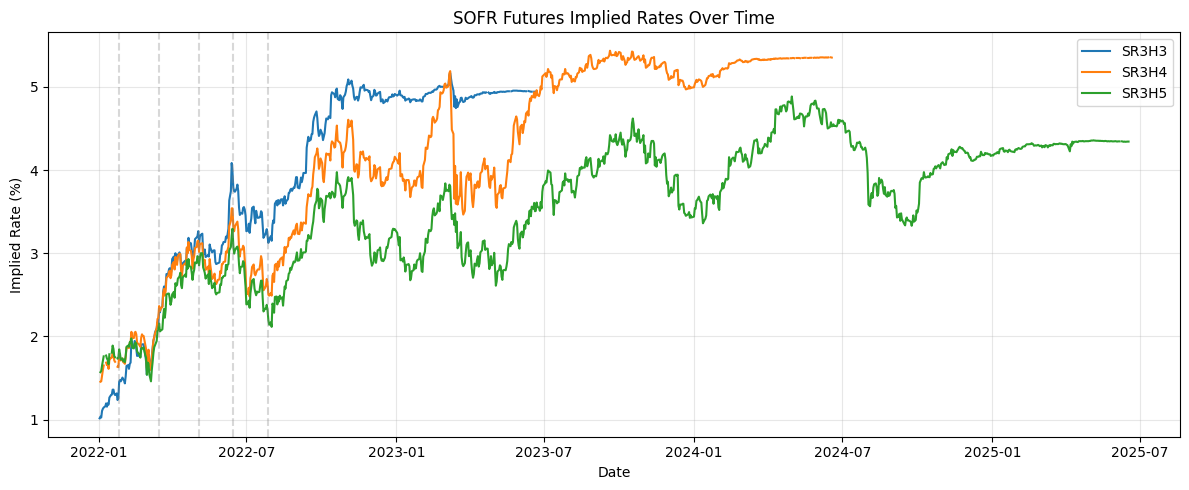

In [ ]:
fig, ax = plt.subplots(figsize=figsize)

contracts_to_plot = ['SR3H3', 'SR3H4', 'SR3H5']

for ticker in contracts_to_plot:
    if ticker in sofr_rates.columns:
        ax.plot(sofr_rates.index, sofr_rates[ticker], label=ticker, linewidth=1.5)

for d in fomc_sample['date'][:5]:  # First 5 meetings
    ax.axvline(d, color='gray', alpha=0.3, linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Implied Rate (%)')
ax.set_title('SOFR Futures Implied Rates Over Time')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

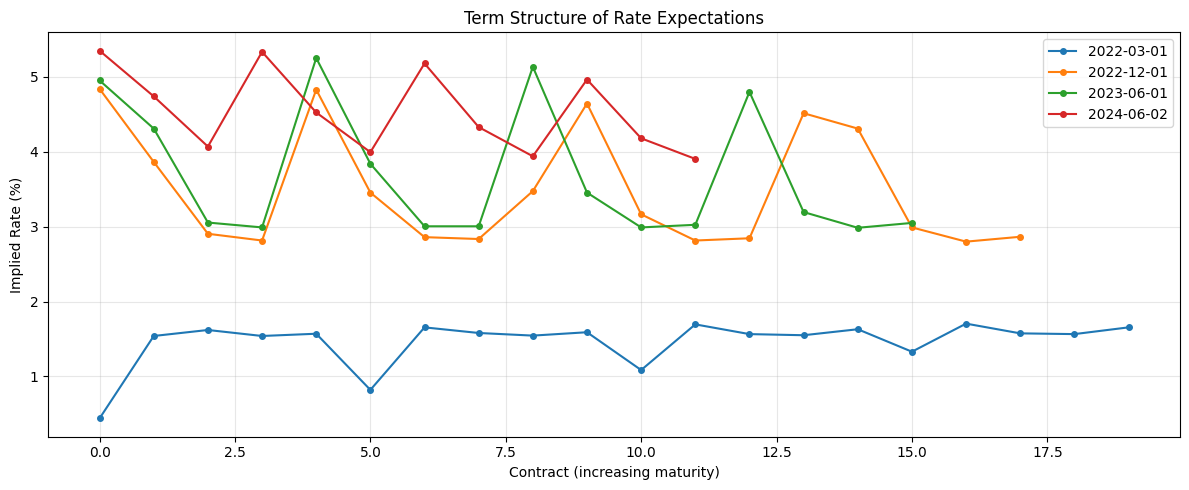

In [ ]:
snapshot_dates = ['2022-03-01', '2022-12-01', '2023-06-01', '2024-06-01']

fig, ax = plt.subplots(figsize=figsize)

for date_str in snapshot_dates:
    date = pd.Timestamp(date_str)
    if date not in sofr_rates.index:
        date = sofr_rates.index[sofr_rates.index.get_indexer([date], method='nearest')[0]]

    rates = sofr_rates.loc[date].dropna()

    x = range(len(rates))
    ax.plot(x, rates.values, 'o-', label=str(date.date()), markersize=4)

ax.set_xlabel('Contract (increasing maturity)')
ax.set_ylabel('Implied Rate (%)')
ax.set_title('Term Structure of Rate Expectations')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
snapshot_dates = [
    "2022-01-03",
    "2022-09-15",
    "2023-05-15",
    "2024-01-15"
]

snapshot_dates = [pd.to_datetime(d) for d in snapshot_dates]

In [ ]:
ticker_expiry = contract_info.set_index('ticker')['expiry_date']

valid_cols = [c for c in sofr_rates.columns if c in ticker_expiry.index]
expiries = ticker_expiry[valid_cols].sort_values()
ordered_cols = expiries.index
ordered_expiries = expiries.values

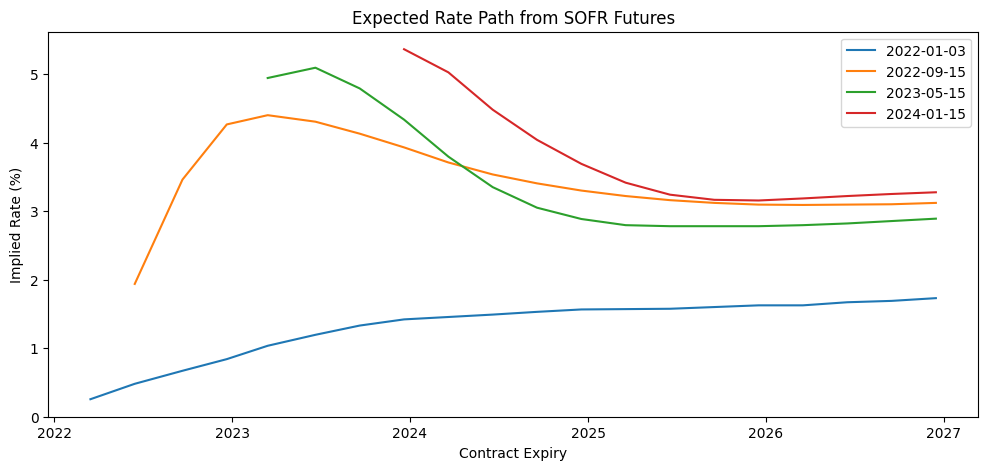

In [ ]:
plt.figure(figsize=(12,5))

for d in snapshot_dates:
    # nearest available trading day
    d_use = sofr_rates.index[sofr_rates.index.get_indexer([d], method='nearest')[0]]
    curve = sofr_rates.loc[d_use, ordered_cols]
    plt.plot(ordered_expiries, curve, label=str(d_use.date()))

plt.title("Expected Rate Path from SOFR Futures")
plt.xlabel("Contract Expiry")
plt.ylabel("Implied Rate (%)")
plt.legend()
plt.show()

In [ ]:
terminal_rate = sofr_rates.max(axis=1)

first_above_5 = terminal_rate[terminal_rate > 5].index.min()
print("First day terminal rate > 5%:", first_above_5.date())

First day terminal rate > 5%: 2022-11-01


In [ ]:
cuts_start_date = None

for d in sofr_rates.index:
    curve = sofr_rates.loc[d, ordered_cols].dropna()
    if len(curve) < 10:
        continue

    peak_rate = curve.max()
    peak_idx = curve.idxmax()
    peak_pos = list(curve.index).index(peak_idx)

    later_rates = curve.iloc[peak_pos+1:]
    if len(later_rates) == 0:
        continue

    drop = peak_rate - later_rates.min()

    # Strong economic filter
    if peak_rate >= 4.0 and drop >= 0.75:
        cuts_start_date = d
        break

print("Cuts first priced:", cuts_start_date)

Cuts first priced: 2022-06-13 00:00:00


<Axes: title={'center': 'SOFR Expectations Curve — 2022-06-13'}, xlabel='ticker'>

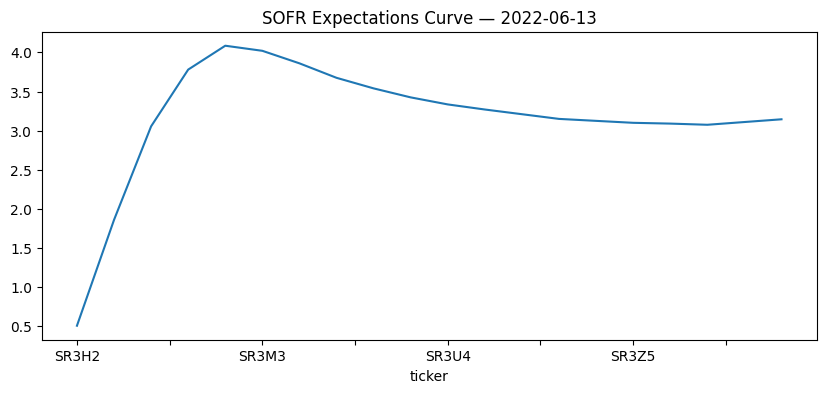

In [ ]:
sofr_rates.loc["2022-06-13", ordered_cols].plot(
    title="SOFR Expectations Curve — 2022-06-13",
    figsize=(10,4)
)

Markets first began pricing eventual rate cuts in mid-June 2022, when the SOFR futures curve developed a clear hump shape, with longer-dated contracts implying rates meaningfully below the expected terminal level. This coincided with the start of the Fed’s most aggressive tightening phase.

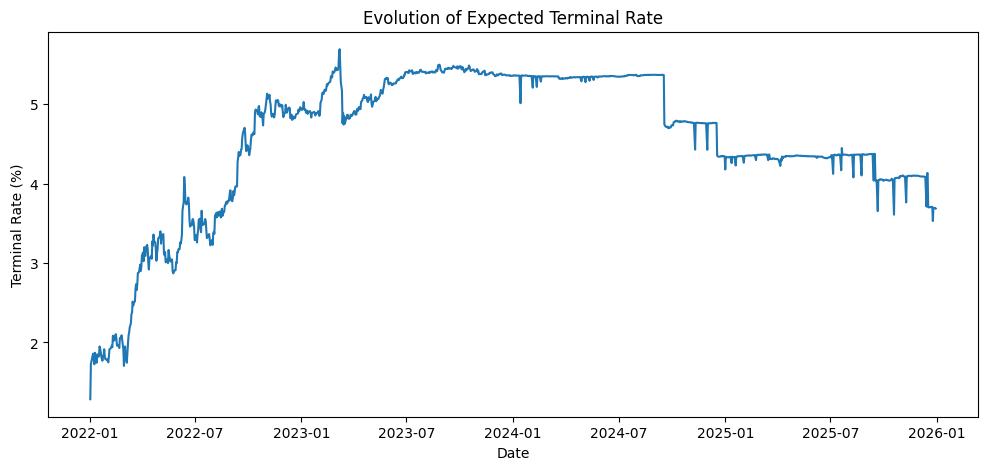

In [ ]:
terminal_rate = sofr_rates.max(axis=1)

plt.figure(figsize=(12,5))
plt.plot(terminal_rate)
plt.title("Evolution of Expected Terminal Rate")
plt.ylabel("Terminal Rate (%)")
plt.xlabel("Date")
plt.show()

In [ ]:
fomc = pd.read_excel(DATA_PATH + "project_fomc_dates.xlsx")
fomc['date'] = pd.to_datetime(fomc['date'])
svb_date = pd.to_datetime("2023-03-10")

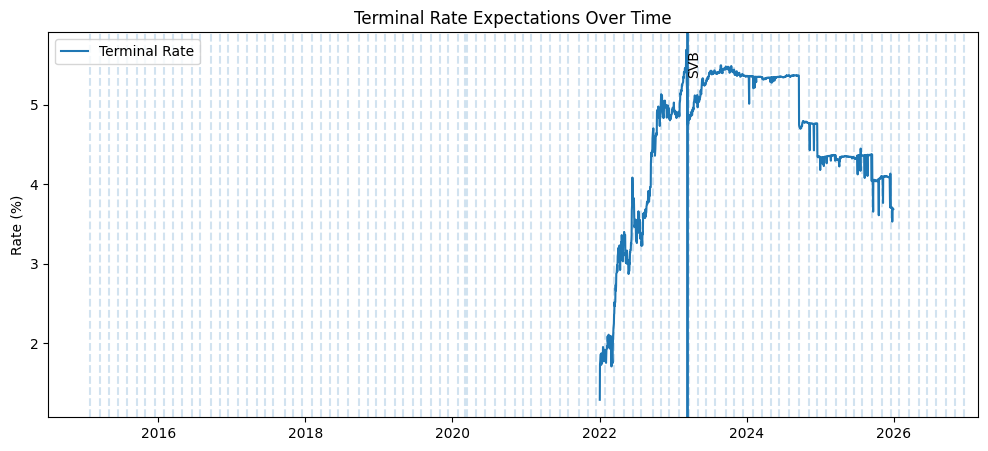

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(terminal_rate, label="Terminal Rate")

for d in fomc['date']:
    plt.axvline(d, linestyle='--', alpha=0.2)

plt.axvline(svb_date, linestyle='-', linewidth=2)
plt.text(svb_date, terminal_rate.max(), "SVB", rotation=90, va='top')

plt.title("Terminal Rate Expectations Over Time")
plt.ylabel("Rate (%)")
plt.legend()
plt.show()